<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HARD WORK


In [191]:
#install library
!pip install google-search-results
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
#import library needed for the search
import numpy as np
import pandas as pd
import plotly.express as px 
import matplotlib.pyplot as plt
from serpapi import GoogleSearch
import plotly.express as px
import squarify
import seaborn as sns
import re 

plt.style.use('fivethirtyeight')

In [193]:
#SerpApi google search
search_term="Data Analyst" #Job to be searching
search_location="United States" #Places where you search https://serpapi.com/google-countries


params = {
  "q": search_term,
  "location": search_location,
  "engine" : "google_jobs",
  "hl": "en",
  "gl": "us",
  "google_domain": "google.com",
  "api_key": "a74096ebb3b875e086bdf8353fb1e90edbd5bdbb2c9e9ea9bf863f98e55ac489"
}

In [194]:
#creating dataframe with the information obtenied of the search
search = GoogleSearch(params)
results = search.get_dict()
jobs_df = results['jobs_results']
jobs_df = pd.DataFrame(jobs_df)
jobs_df = pd.concat([pd.DataFrame(jobs_df),
                     pd.json_normalize(jobs_df['detected_extensions'])],
                    axis=1).drop('detected_extensions',1)
         

https://serpapi.com/search


<ipython-input-194-d668609e91a2>:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [195]:
#Quick looking on the dataframe
jobs_df.head(1)

,title,company_name,location,via,description,job_highlights,related_links,thumbnail,extensions,job_id,posted_at,schedule_type,work_from_home,salary
0,Data Analyst,EquipmentShare,Anywhere,via LinkedIn,EquipmentShare is Hiring a Data Analyst\n\nEqu...,"[{'title': 'Qualifications', 'items': ['Degree...",[{'link': 'https://www.google.com/search?ucbcb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"[12 hours ago, Work from home, Full-time, Heal...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,12 hours ago,Full-time,True,NaN


In [196]:
jobs_df.isnull().sum() #Looking for null values

title             0
company_name      0
location          0
via               0
description       0
job_highlights    1
related_links     0
thumbnail         4
extensions        0
job_id            0
posted_at         0
schedule_type     0
work_from_home    6
salary            8
dtype: int64

In [197]:
jobs_df.shape #Shape of the DataFrame

(10, 14)

In [198]:
jobs_df.info() #Information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           10 non-null     object
 1   company_name    10 non-null     object
 2   location        10 non-null     object
 3   via             10 non-null     object
 4   description     10 non-null     object
 5   job_highlights  9 non-null      object
 6   related_links   10 non-null     object
 7   thumbnail       6 non-null      object
 8   extensions      10 non-null     object
 9   job_id          10 non-null     object
 10  posted_at       10 non-null     object
 11  schedule_type   10 non-null     object
 12  work_from_home  4 non-null      object
 13  salary          2 non-null      object
dtypes: object(14)
memory usage: 1.2+ KB


**# HARD SKILLS **


In [199]:
#Normalize column
jobs = pd.json_normalize(jobs_df.job_highlights )

In [200]:
jobs_df2 = pd.DataFrame(jobs) #Creating DataFrame with data obtenied from the normalization
Ujobs = jobs_df2[0].apply(pd.Series) #applying Series to read data

#Ujobs.loc[Ujobs["items"].str.contains("SQL")]

In [201]:
Ujobs = Ujobs.drop(columns = "title") #Eliminated column with irrelevant information 
Ujobs = Ujobs.dropna()

In [202]:
Ujobs

,items
0,"[Degree in Math, Statistics, or other quantita..."
1,[3+ years’ previous analytics experience devel...
2,[The requirements listed are representative of...
3,[Bachelor's degree (or equivalent) in business...
4,[Bachelor’s degree or higher in computer scien...
5,[The ideal candidate is also comfortable worki...
6,[Strong business acumen and analytical skills ...
7,"[Experience level: Entry Level, Minimum 1 year..."
8,[The ideal candidate will have a strong backgr...


In [203]:
# Creating new DataFrame extracting data to search keywords
toolsJob = pd.DataFrame()
for i in Ujobs['items']:
  toolsJob = toolsJob.append(i,ignore_index=True)

In [204]:
pd.pivot_table(toolsJob,index = toolsJob)

""
0
2+ years of experience with Alteryx or similar ETL software
2+ years of experience with JIRA or similar ticketing software
2+ years of experience with SQL
2+ years of on the job analyst work experience using required programming languages
3+ years of experience in an analytical position
...
The ideal candidate will have a strong background in data analysis and experience working in the ecommerce and marketing industry
"The requirements listed are representative of the knowledge, skills, and/or abilities required"
Values a diverse and inclusive work environment


In [205]:
# Extracting hard skill to do job

tools = []
for i in toolsJob[0]:
  if "SQL" in i:
    tools.append("SQL")


for i in toolsJob[0]:
  if "Python" in i:
    tools.append("Python")

for i in toolsJob[0]:  
  if " R " in i:
    tools.append("R")

for i in toolsJob[0]:   
  if "Excel" in i:
    tools.append("Excel")

for i in toolsJob[0]:
  if "Tableau" in i:
    tools.append("Tableau")

for i in toolsJob[0]:   
  if "Power BI" in i:
    tools.append("Power BI")

for i in toolsJob[0]:   
  if "TensorFlow" in i:
    tools.append("TensorFlow")    

In [206]:
tools

['SQL',
 'SQL',
 'SQL',
 'SQL',
 'SQL',
 'Python',
 'Python',
 'Python',
 'Python',
 'Python',
 'R',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Excel',
 'Tableau',
 'Tableau',
 'Power BI',
 'Power BI',
 'Power BI']

**# AVERAGE TIME**

In [207]:
#Extracting time and place to work

time = []
for i in jobs_df['extensions']:
  if "Work from home" in i:
    time.append("Work from home")
  
for i in jobs_df['extensions']:
  if "Full-time" in i:
    time.append("Full-time")

for i in jobs_df['extensions']:
  if "Part-time" in i:
    time.append("Part-time")   



# **SUMMARY**

In [177]:
#Sunburst chart of the companies that offer the job

name = jobs_df.groupby(['company_name'])['company_name'].count()
px.sunburst(name, path=[name.index], values=name.values)

In [178]:
toolss = pd.DataFrame(tools)

(0.0, 8.0)

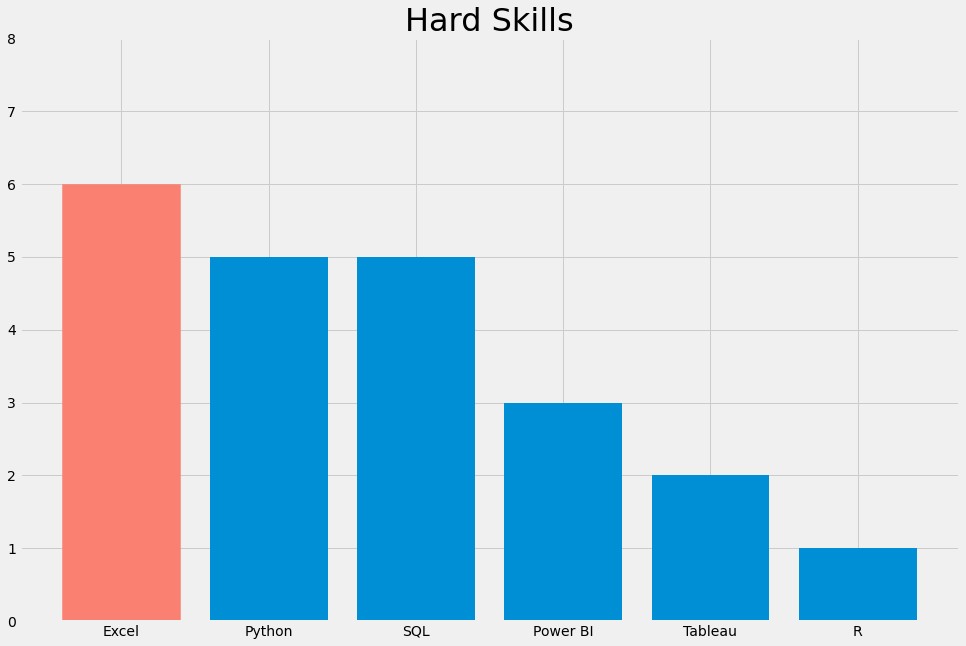

In [179]:
# Bar chart of the hard skills needed to execute the job
t = toolss.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
fig = plt.bar(x=t.index, height=t.values)
fig[0].set_color('salmon')
plt.title("Hard Skills", fontsize=32)
plt.ylim(0,8)


(0.0, 11.0)

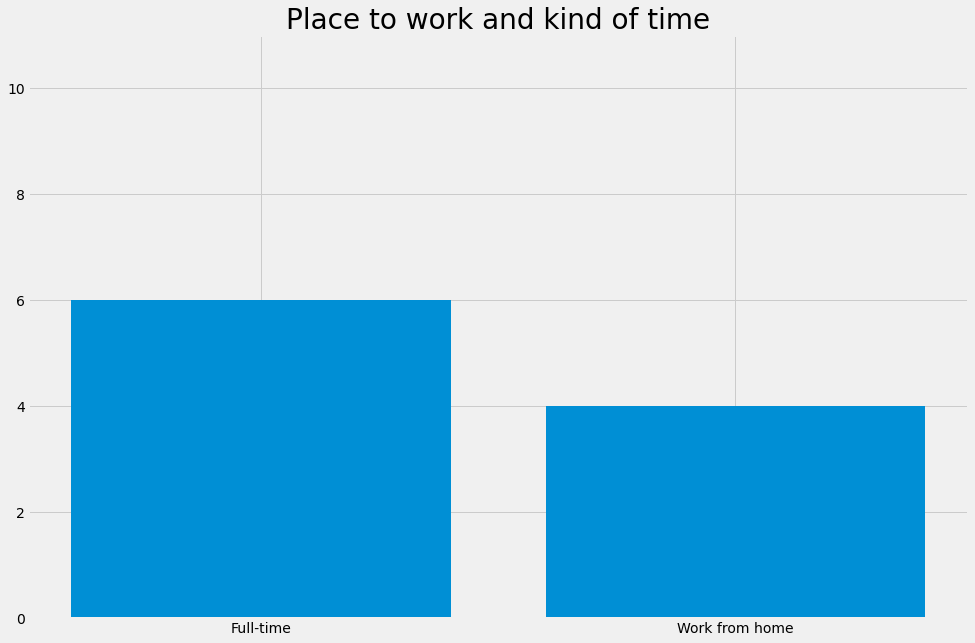

In [180]:
#Bar chart of the places and time to do the job

ti = pd.DataFrame(time)
tim =ti.groupby(0)[0].count().sort_values(ascending=False)

plt.figure(figsize=(15,10))
plt.bar(x=tim.index, height= tim.values)
plt.title("Place to work and kind of time", fontsize=28)
plt.ylim(0,11)


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

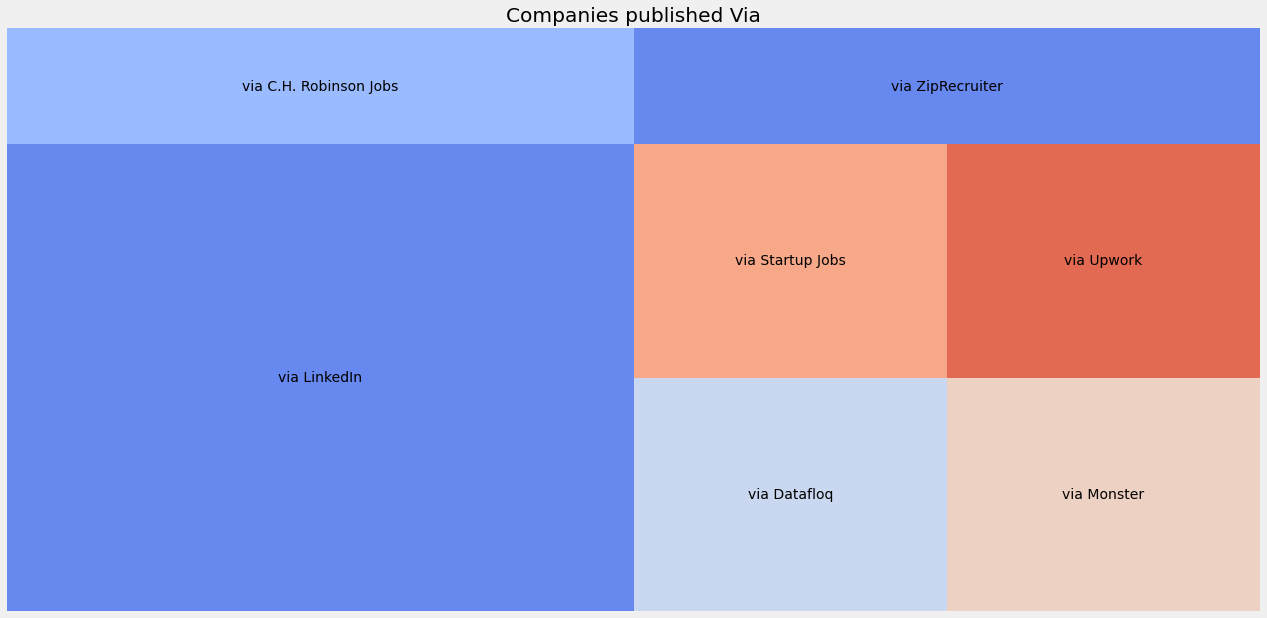

In [209]:
#Tree-map chart than where the companies published the vacancies

via = jobs_df.groupby(['via'])['via'].count().sort_values(ascending=False)
name

plt.figure(figsize=(20,10))
sizes=via.values
label=via.index
squarify.plot(sizes=sizes,label=label,color = sns.color_palette("coolwarm"))
plt.axis("off")
plt.title("Companies published Via")
plt.xticks(rotation=45, fontsize=20)